In [6]:
%matplotlib inline

import numpy as np
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import json

In [40]:
from collections import OrderedDict

In [45]:
GCA: dict[str, dict[int, int]] = {}
GCF: dict[str, dict[int, int]] = {}
with open("GCA.json", "r") as rf:
    GCA = json.load(rf)

with open("GCF.json", "r") as rf:
    GCF = json.load(rf)

In [64]:
# Sort a dictionary
GCA["1"] = {key: val for key, val in sorted(GCA["1"].items(), key = lambda n: int(n[0]))}

In [58]:
print(GCA["1"])
print(len(GCA["1"]))

{'1': 76, '2': 10, '3': 2, '5': 1, '20': 1, '23': 1, '65': 1, '100': 57, '163': 1, '382': 1, '1601': 1, '1602': 1, '2236': 1, '2891': 1, '10000': 2, '43509': 1, '50000': 9, '18000000': 1}
18


<BarContainer object of 18 artists>

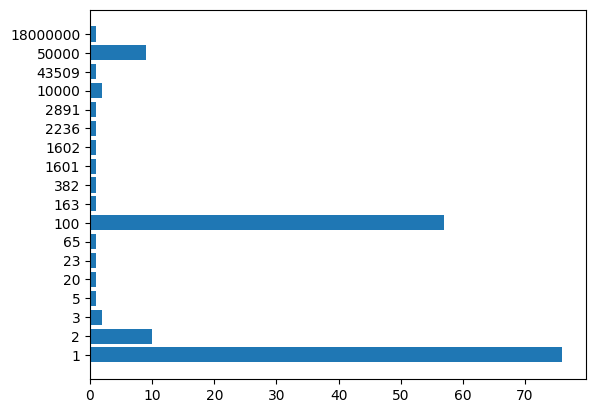

In [85]:
fig, ax = plt.subplots()
ax.barh(GCA["1"].keys(), GCA["1"].values())